In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
X=torch.arange(1,51,1)
Y=2*X

In [4]:
X=X.unsqueeze(dim=1)
Y=Y.unsqueeze(dim=1)

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [6]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight=nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))
        self.bias=nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))
        
    def forward(self,x: torch.Tensor) -> torch.Tensor:
        return self.weight*x + self.bias

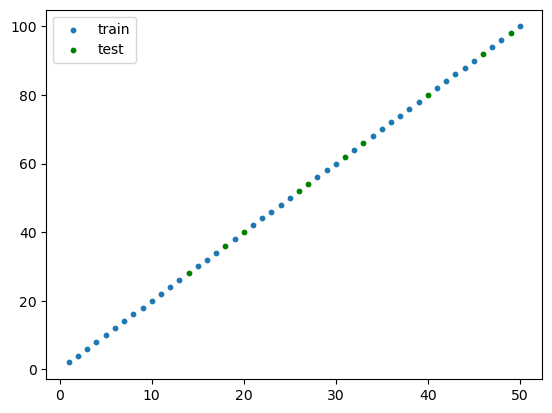

In [7]:
plt.scatter(X_train,Y_train,s=10,label='train')
plt.scatter(X_test,Y_test,s=10,c='g',label='test')
plt.legend()
plt.show()

In [8]:
torch.manual_seed(42)
model=LinearRegression()

In [9]:
list(model.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [10]:
model.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [11]:
with torch.inference_mode():
    Y_pred=model(X_test)
    
Y_pred

tensor([[13.2668],
        [36.2058],
        [28.2654],
        [41.4994],
        [16.7959],
        [44.1462],
        [24.7363],
        [23.8540],
        [30.0299],
        [18.5604]])

In [12]:
Y_pred.dtype

torch.float32

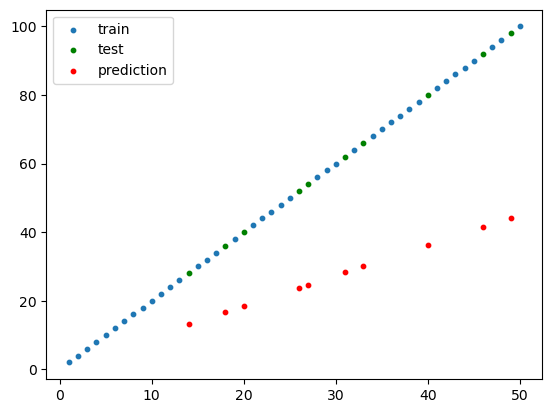

In [13]:
plt.scatter(X_train,Y_train,s=10,label='train')
plt.scatter(X_test,Y_test,s=10,c='g',label='test')
plt.scatter(X_test,Y_pred.detach().numpy(),s=10,c='r',label='prediction')
plt.legend()
plt.show()

In [14]:
loss_fn=nn.L1Loss()

optim=torch.optim.SGD(params=model.parameters(),lr=0.01)

In [15]:
%%time
epoch_count=[]
train_loss_val=[]
test_loss_val=[]

# set training loops using number of epochs (training batches)
for epoch in range(0,1000):   
    
    # set model to training mode initializes all params to have requires_grad=True
    model.train()           
    
    # fit the model
    y_pred=model(X_train)    
    
    # calculate loss
    loss=loss_fn(y_pred,Y_train)
    train_loss_val.append(loss)
    #set optimizer gradient track to zero / clear buffer
    optim.zero_grad()
    
    # back-prop the loss
    loss.backward()           
    
    # step optimizer to make param changes
    optim.step()              
    
    # set model to testing mode / switch off settings not required for testing
    model.eval()
    
    #testing loop using inference mode of pytorch
    with torch.inference_mode():
        test_pred=model(X_test)
        test_loss=loss_fn(test_pred,Y_test)
        
    # Display model performance and parameters every 10 epochs
    if epoch%50==0:
        print(f"Epoch: {epoch:5d} || Loss: {loss:.10f} || Test Loss: {test_loss:.10f}")
        print(model.state_dict(),'\n')
        
    test_loss_val.append(test_loss)
    epoch_count.append(epoch)

Epoch:     0 || Loss: 26.2179069519 || Test Loss: 25.6744136810
OrderedDict([('weight', tensor([1.1250])), ('bias', tensor([0.9250]))]) 

Epoch:    50 || Loss: 4.9029226303 || Test Loss: 1.0093418360
OrderedDict([('weight', tensor([2.0030])), ('bias', tensor([0.9175]))]) 

Epoch:   100 || Loss: 4.8199791908 || Test Loss: 1.1178954840
OrderedDict([('weight', tensor([2.0080])), ('bias', tensor([0.8740]))]) 

Epoch:   150 || Loss: 5.1523680687 || Test Loss: 0.6994287372
OrderedDict([('weight', tensor([1.9955])), ('bias', tensor([0.8355]))]) 

Epoch:   200 || Loss: 4.6862511635 || Test Loss: 1.2938792706
OrderedDict([('weight', tensor([2.0165])), ('bias', tensor([0.7915]))]) 

Epoch:   250 || Loss: 5.2678451538 || Test Loss: 0.5591907501
OrderedDict([('weight', tensor([1.9935])), ('bias', tensor([0.7560]))]) 

Epoch:   300 || Loss: 4.2127737999 || Test Loss: 1.8991826773
OrderedDict([('weight', tensor([2.0385])), ('bias', tensor([0.7280]))]) 

Epoch:   350 || Loss: 4.9702477455 || Test Los

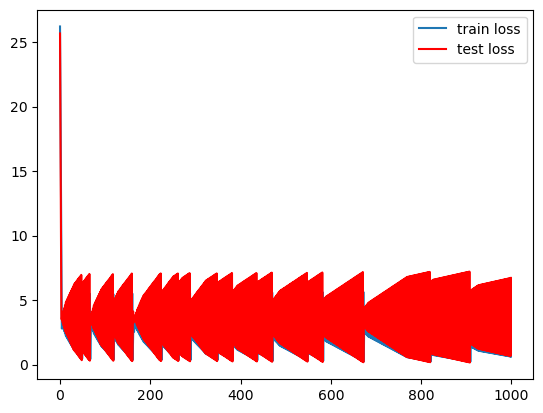

In [16]:
with torch.inference_mode():
    plt.plot(epoch_count,train_loss_val,label='train loss')
    plt.plot(epoch_count,test_loss_val,c='r',label='test loss')
    plt.legend()
    plt.show()

In [17]:
model.state_dict()

OrderedDict([('weight', tensor([1.7653])), ('bias', tensor([0.4135]))])

In [18]:
with torch.inference_mode():
    Y_pred=model(X_test)

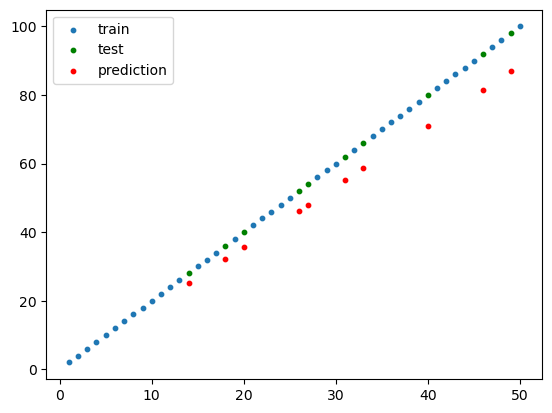

In [19]:
plt.scatter(X_train,Y_train,s=10,label='train')
plt.scatter(X_test,Y_test,s=10,c='g',label='test')
plt.scatter(X_test,Y_pred,s=10,c='r',label='prediction')
plt.legend()
plt.show()

In [25]:
from pathlib import Path
path=Path("models")
path.mkdir(parents=True,exist_ok=True)

name="lrparams.pth"
model_path=path/name

print(f"Saving Model to: {model_path}")
torch.save(obj=model.state_dict(),
          f=model_path)

Saving Model to: models/lrparams.pth


In [26]:
lr=LinearRegression()
lr.state_dict()

OrderedDict([('weight', tensor([0.3829])), ('bias', tensor([0.9593]))])

In [27]:
lr.load_state_dict(torch.load(f=model_path))

<All keys matched successfully>

In [28]:
lr.state_dict()

OrderedDict([('weight', tensor([1.7653])), ('bias', tensor([0.4135]))])

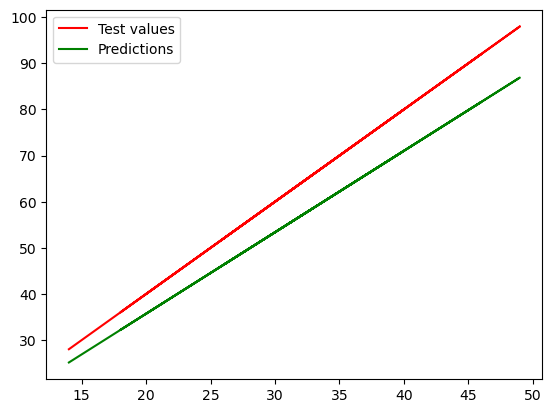

In [29]:
model.eval()
with torch.inference_mode():
    y_preds=model(X_test)
    
plt.plot(X_test,Y_test,c='r',label='Test values')
plt.plot(X_test,y_preds,c='g',label='Predictions')
plt.legend()
plt.show()